# Word Cloud

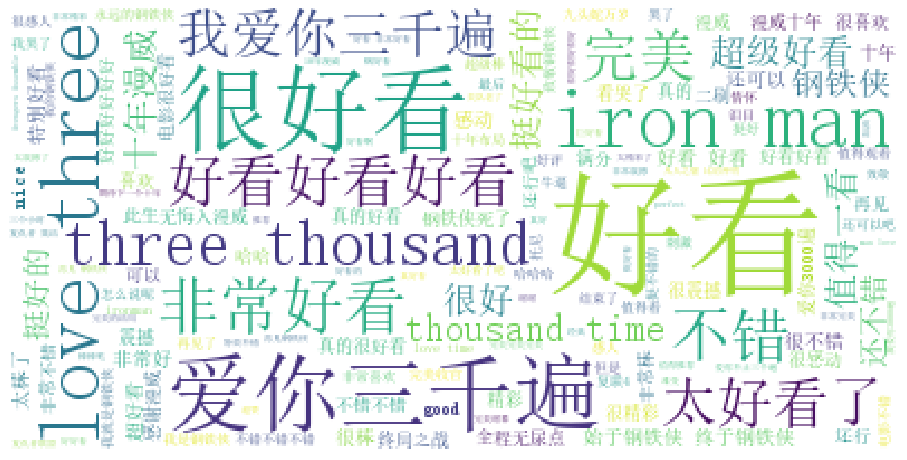

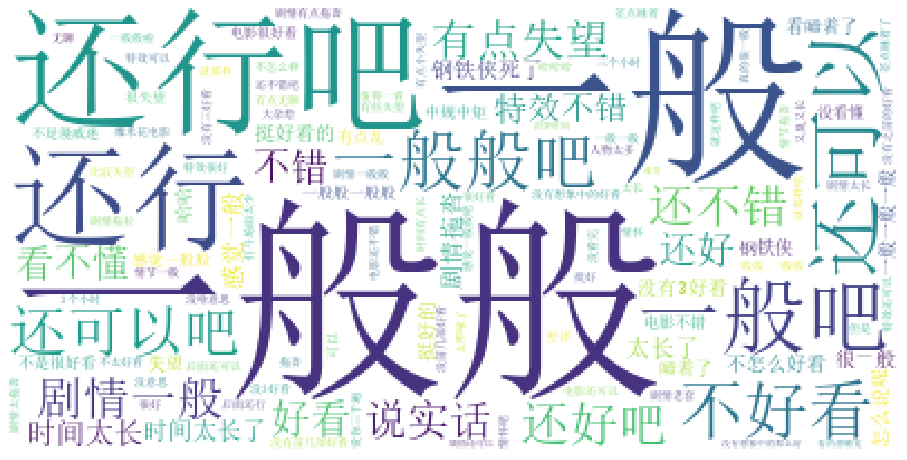

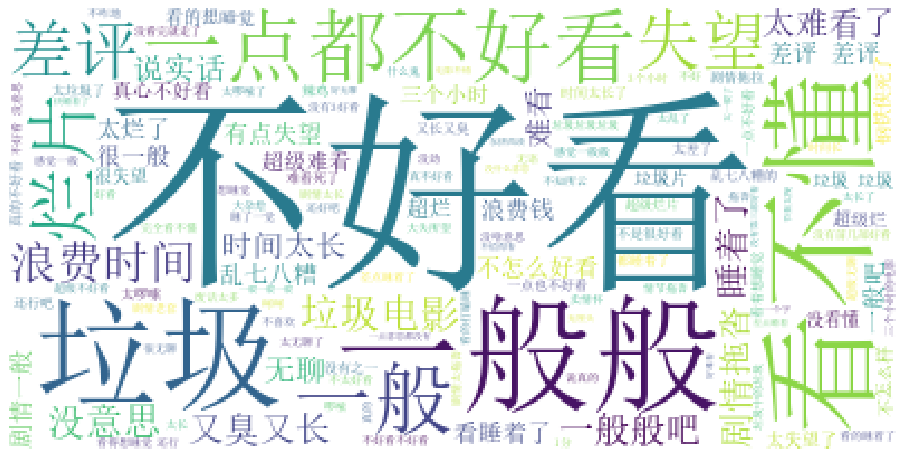

In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# wordcloud
from wordcloud import WordCloud
file_list=['复仇者联盟4_好评','复仇者联盟4_中评','复仇者联盟4_差评']
sent_list = ['pos ', 'mid ', 'neg ']
for i in range(len(file_list)):
    f=open('comments_sets/'+file_list[i]+'.txt','r',encoding='utf-8').read()
    cloud = WordCloud('C:/Windows/Fonts/simsun.ttc',background_color = 'white')
    word_cloud = cloud.generate(f)
    # 绘制词云
    plt.figure(figsize=(16, 16))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.savefig(sent_list[i]+'wordcloud.jpeg')
    plt.show()

# Sentiment Score

In [1]:
# sentiment score
from snownlp import SnowNLP

In [7]:
pos_com =  pd.read_csv('comments_sets/复仇者联盟4_好评.txt',sep = 'ssr',encoding = 'utf-8',header = None, engine='python')
pos_com.columns = ['comments']
mid_com  = pd.read_csv('comments_sets/复仇者联盟4_中评.txt',sep = 'ssr',encoding = 'utf-8',header = None, engine='python')
mid_com.columns = ['comments']
neg_com = pd.read_csv('comments_sets/复仇者联盟4_差评.txt',sep = 'ssr',encoding = 'utf-8',header = None, engine='python')
neg_com.columns = ['comments']

In [8]:
pos_com['semiscore'] = pos_com['comments'].apply(lambda x: SnowNLP(x).sentiments)
print('done')

mid_com['semiscore'] = mid_com['comments'].apply(lambda x: SnowNLP(x).sentiments)
print('done')

neg_com['semiscore'] = neg_com['comments'].apply(lambda x: SnowNLP(x).sentiments)
print('done')

done
done
done


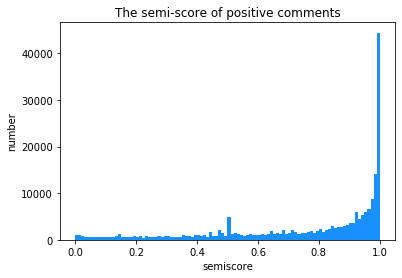

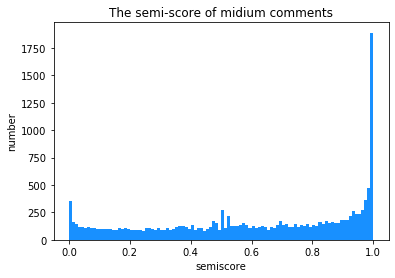

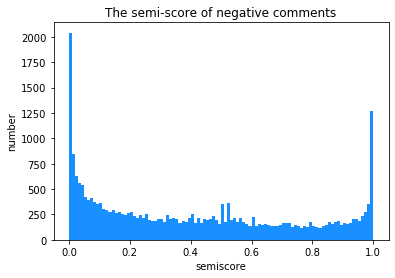

In [12]:
import matplotlib.pyplot as plt
sent_list = ['pos ', 'mid ', 'neg ']
sent_com_list=[pos_com,mid_com,neg_com]
sent_com_list2=['positive','midium','negative']
for i in range(len(sent_com_list)):
    plt.hist(sent_com_list[i]['semiscore'], bins=np.arange(0, 1.01, 0.01), label='semisocre', color='#1890FF')
    plt.xlabel("semiscore")
    plt.ylabel("number")
    plt.title("The semi-score of "+sent_com_list2[i]+" comments")
    plt.savefig(sent_list[i]+'semisore.jpeg')
    plt.show()

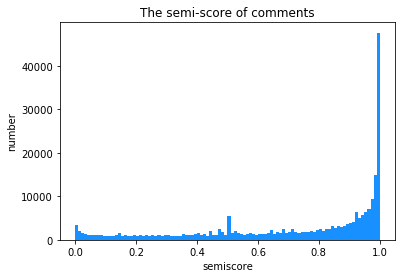

In [13]:
com = pd.concat([pos_com,mid_com,neg_com])
plt.hist(com['semiscore'], bins=np.arange(0, 1.01, 0.01), label='semisocre', color='#1890FF')
plt.xlabel("semiscore")
plt.ylabel("number")
plt.title("The semi-score of comments")
plt.savefig('semisore.jpeg')
plt.show()